<a href="https://colab.research.google.com/github/farisahmed123/Computer-Vision-OpenCv/blob/main/OpenCv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

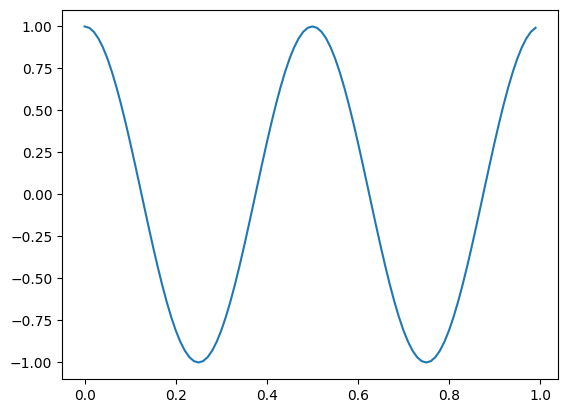

In [ ]:
t = np.arange(0,1,0.01)
x = np.cos(2*np.pi*2*t)
plt.plot(t,x)

<StemContainer object of 3 artists>

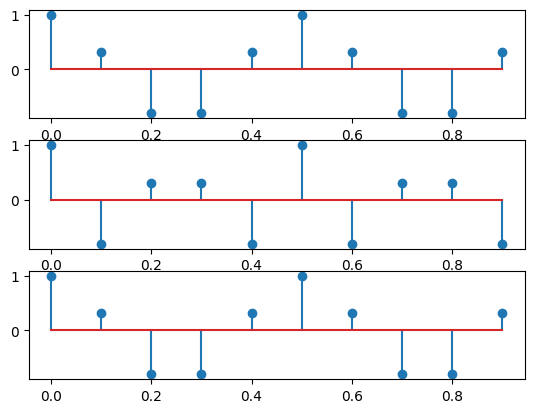

In [ ]:
t = np.arange(0,1,0.1)
xt1 = np.cos(2*np.pi*2*t)
xt2 = np.cos(2*np.pi*4*t)
xt3 = np.cos(2*np.pi*8*t)
plt.subplot(3,1,1)
plt.stem(t,xt1)
plt.subplot(3,1,2)
plt.stem(t,xt2)
plt.subplot(3,1,3)
plt.stem(t,xt3)
# plt.plot(t,xt1)

Text(0, 0.5, 'Y-Label')

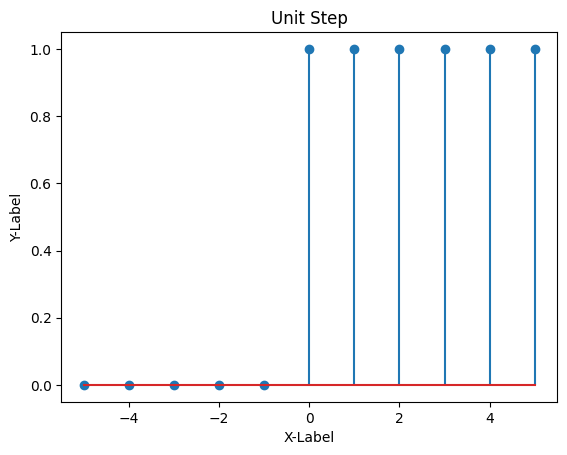

In [ ]:
n = [-1,-2,-3,-4,-5,0,1,2,3,4,5]
delta = [0,0,0,0,0,1,1,1,1,1,1]
plt.stem(n,delta)
plt.title("Unit Step")
plt.xlabel("X-Label")
plt.ylabel("Y-Label")

<StemContainer object of 3 artists>

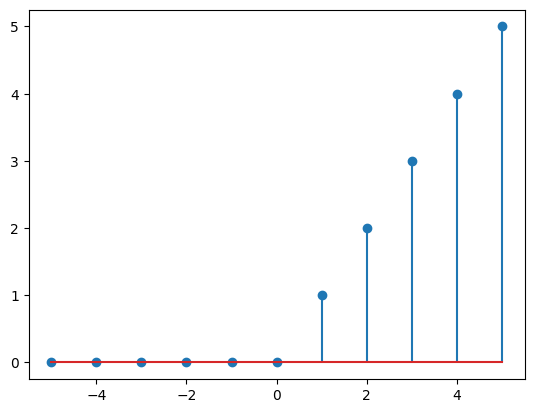

In [ ]:
t = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
count=0
n = np.zeros(len(t))
for i in range(11):
  if t[i]<=0:
    n[i] = 0
  else:
    count = count+1
    n[i] = count
n
plt.stem(t,n)



# **Scipy Special Function Trignometry and Exponent**

In [ ]:
from scipy import special
n = special.exp2(3)
b = special.sindg(30)
print(n,b)

8.0 0.49999999999999994


# ***Integration***

In [ ]:
from scipy import integrate
i=integrate.quad(lambda x:special.exp2(x),0,1)
i

(1.4426950408889634, 1.6017132519074587e-14)

In [ ]:
e=lambda x,y:x*y**2
f = lambda x:1
g = lambda x:-1
integrate.dblquad(e,0,2,f,g)

(-0.0, 4.405142707569776e-14)

## **Fourier Transform**

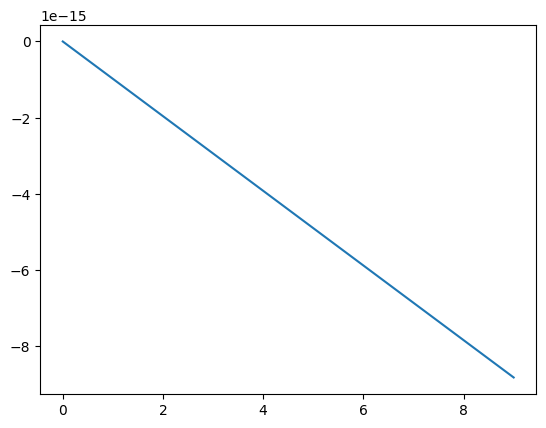

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Create a clean 10Hz signal
t = np.linspace(0,1,1000)
clean = np.sin(2*np.pi*4*t)
noise = np.random.normal(0,0.5,1000)
messy_signal = clean+noise

# # Add "Static Noise" (Random mess)
# noise = np.random.normal(0, 0.5, 1000)
# messy_signal = clean + noise

# Fourier Transform to find the 'Recipe'
recipe = np.fft.fft(messy_signal)
freqs = np.fft.fftfreq(len(t), 1/1000)

# FILTER: Keep only the 10Hz 'ingredient', set everything else to zero
recipe[np.abs(freqs) > 10] = 0

# Inverse Fourier Transform: Turn the recipe back into a wave!
cleaned_signal = np.fft.ifft(recipe)
plt.plot(t,cleaned_signal)


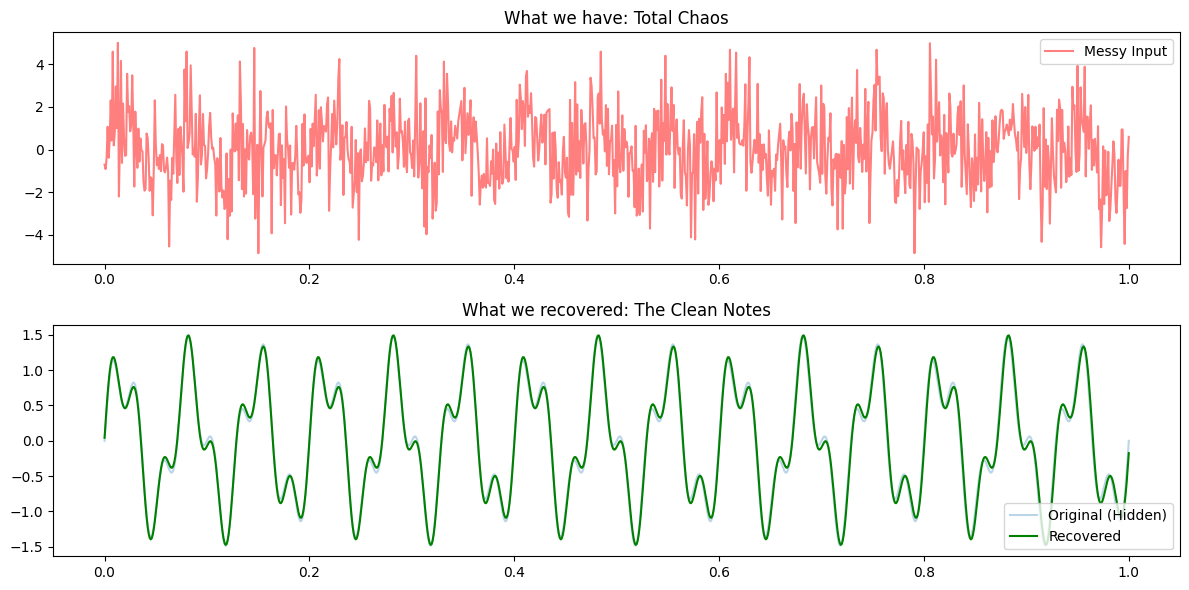

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. THE MYSTERY SIGNAL (Simulating a real-world messy capture)
t = np.linspace(0, 1, 1000)
# Hidden notes: 15Hz and 40Hz
hidden_notes = np.sin(2*np.pi*15*t) + 0.5*np.sin(2*np.pi*40*t)
# Heavy random noise
noise = np.random.normal(0, 1.5, 1000)
messy_signal = hidden_notes + noise

# 2. THE DISCOVERY PHASE (FFT)
recipe = np.fft.fft(messy_signal)
freqs = np.fft.fftfreq(len(t), 1/1000)
power = np.abs(recipe) # How 'loud' each frequency is

# 3. IDENTIFYING AND CLEANING
# We look for frequencies where the power is higher than a 'noise floor'
# Let's say any power below 200 is just noise.
clean_recipe = recipe.copy()
clean_recipe[power < 200] = 0

# 4. BRINGING IT BACK TO LIFE
cleaned_signal = np.fft.ifft(clean_recipe)

# --- VISUALIZING THE RECOVERY ---
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, messy_signal, color='red', alpha=0.5, label='Messy Input')
plt.title("What we have: Total Chaos")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, hidden_notes, label='Original (Hidden)', alpha=0.3)
plt.plot(t, cleaned_signal.real, color='green', label='Recovered')
plt.title("What we recovered: The Clean Notes")
plt.legend()

plt.tight_layout()
plt.show()

# **Wavelet Transform**

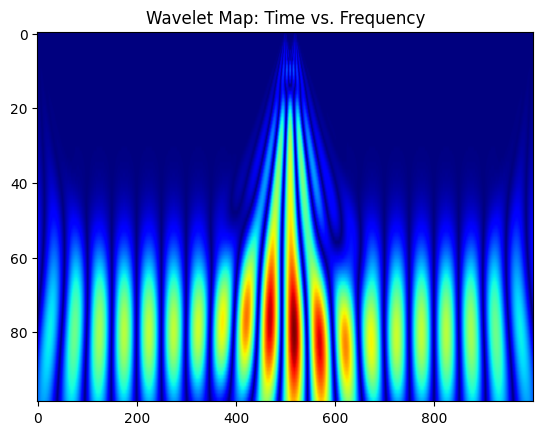

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# 1. GENERATE DATA: A wave with a sudden 'glitch' in the middle
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 10 * t)  # 10Hz wave
signal[500:520] += 5                # The sudden 'glitch' at 0.5 seconds

# 2. FOURIER TRANSFORM: Shows WHAT frequencies exist
fourier = np.abs(np.fft.fft(signal))

# 3. WAVELET TRANSFORM: Shows WHEN the frequencies happen
# scales 1 to 100 act like a 'zoom lens' for different frequencies
scales = np.arange(1, 100)
coeffs, freqs = pywt.cwt(signal, scales, 'morl')

# 4. PLOT (Simple View)
plt.imshow(np.abs(coeffs), aspect='auto', cmap='jet')
plt.title("Wavelet Map: Time vs. Frequency")
plt.show()

In [ ]:
import numpy as np

# A signal with a 50Hz hum (like electricity)
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 50 * t)

# Get the 'Recipe'
recipe = np.fft.fft(signal)
# Identify the 50Hz spike
freq_labels = np.fft.fftfreq(len(t), d=t[1]-t[0])

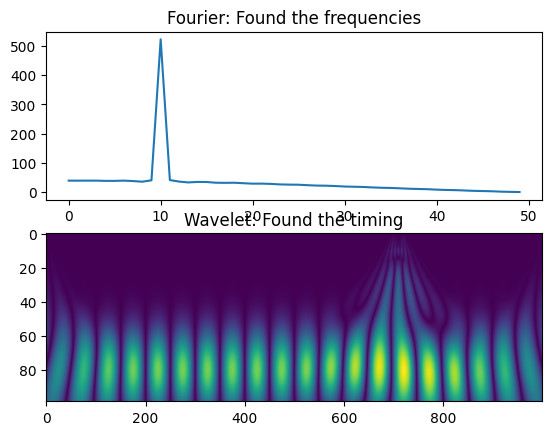

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 1. THE DATA: A 10Hz wave with a sudden 'noise' at 0.7 seconds
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 10 * t)
signal[700:720] += 2  # A sudden jump (the glitch)

# 2. THE FOURIER (WHAT is in the signal?)
# Tells us the frequencies, but 'smears' them across time
fourier = np.abs(np.fft.fft(signal))

# 3. THE WAVELET (WHEN did it happen?)
# 'morl' is the pattern; it slides across time to find the glitch
coeffs, freqs = pywt.cwt(signal, np.arange(1, 100), 'morl')

# 4. SHOW THE DIFFERENCE
plt.subplot(2, 1, 1)
plt.plot(fourier[:50]) # Show the frequency spikes
plt.title("Fourier: Found the frequencies")

plt.subplot(2, 1, 2)
plt.imshow(np.abs(coeffs), aspect='auto') # Show the time-frequency map
plt.title("Wavelet: Found the timing")
plt.show()

# **Asynchronization**

In [ ]:
import asyncio

async def fetch_data(id,sleep):
  print(f"Starting coRoutine of id : {id}")
  await asyncio.sleep(sleep)
  return {f"data from id : {id}"}

async def main():
    print("Starting main execution...")
    # This will run them sequentially because of your nested structure
    task1 = asyncio.create_task(fetch_data(1,1))
    task2 = asyncio.create_task(fetch_data(2,1))

    task3 = asyncio.create_task(fetch_data(3,1))
    r1=await task1
    r2=await task2
    r3=await task3
    print(r1,r2,r3)

    print("All tasks finished.")

await main()

Starting main execution...
Starting coRoutine of id : 1
Starting coRoutine of id : 2
Starting coRoutine of id : 3
{'data from id : 1'} {'data from id : 2'} {'data from id : 3'}
All tasks finished.


In [ ]:
import time
def fetch_data(id,sleep):
  print(f"Starting Task : {id}")
  time.sleep(sleep)
  print(f"Task : {id} Completed")
r1 = fetch_data(1,1)
r2 = fetch_data(2,1)
print(r1,r2)


Starting Task : 1
Task : 1 Completed
Starting Task : 2
Task : 2 Completed
None None


# **Synchronization**

In [ ]:
import asyncio
shareed_variable = 0
lock = asyncio.Lock()

async def increment():
  global shareed_variable
  async with lock:
    print(f"Resource before modification : {shareed_variable}")
    shareed_variable += 1
    print(f"Resource after modificatin : {shareed_variable}")

async def main():
 t1 = increment()
 t2 = increment()
 await asyncio.gather(t1,t2)
await main()


Resource before modification : 0
Resource after modificatin : 1
Resource before modification : 1
Resource after modificatin : 2


# **Semaphor**

In [ ]:
import asyncio
async def acces_control(semaphore,id):
  async with semaphore :
    print(f"Accesing Resource : {id}")
    await asyncio.sleep(1)
    print(f"Finished Accesing Resource : {id}")
async def main():
  semaphore = asyncio.Semaphore(2)
  await asyncio.gather(*(acces_control(semaphore,i) for i in range(5)))
await main()


Accesing Resource : 0
Accesing Resource : 1
Finished Accesing Resource : 0
Finished Accesing Resource : 1
Accesing Resource : 2
Accesing Resource : 3
Finished Accesing Resource : 2
Finished Accesing Resource : 3
Accesing Resource : 4
Finished Accesing Resource : 4


In [2]:
import json
# Define the dummy data
camera_data = [
    {"timestamp": 1.02, "image_id": "frame_1", "quality_score": 0.95},
    {"timestamp": 1.05, "image_id": "frame_2", "quality_score": 0.42},
    {"timestamp": 1.08, "image_id": "frame_3", "quality_score": 0.88}
]

motion_data = [
    {"timestamp": 1.01, "accel_z": 9.81},
    {"timestamp": 1.02, "accel_z": 9.82},
    {"timestamp": 1.03, "accel_z": 10.5},
    {"timestamp": 1.05, "accel_z": 9.79},
    {"timestamp": 1.07, "accel_z": 9.81}
]
with open('camera_data.json','w') as f:
 json.dump(camera_data,f)

with open('motion_data.json','w') as f:
 json.dump(motion_data,f)



print("Files created successfully in Colab!")

Files created successfully in Colab!


In [9]:
import json
def load_json(filename):
  with open(filename,'r') as f:
    return json.load(f)

def run_sync_processor():
 cam_logs = load_json('camera_data.json')
 mot_logs = load_json('motion_data.json')

 results = []
 for img in cam_logs:
  t_img = img['timestamp']
  closet = min(mot_logs,key=lambda x: abs(x['timestamp'] - t_img))
  results.append({
      "timestamp":t_img,
       "frame":img['image_id'],
       "status":"PASS" if img['quality_score'] > 0.5 else "FAIL",
       "motion_value":closet['accel_z']
  })
 print(f"{'Time':<10} | {'Status':<6} | {'Accel Z':<8}")
 print("-" * 30)
 for r in results:
      print(f"{r['timestamp']:<10} | {r['status']:<6} | {r['motion_value']:<8}")
run_sync_processor()

Time       | Status | Accel Z 
------------------------------
1.02       | PASS   | 9.82    
1.05       | FAIL   | 9.79    
1.08       | PASS   | 9.81    


In [6]:
import json

def load_json_file(filename):
    with open(filename, 'r') as f:
        return json.load(f)

def run_sync_processor():
    # 1. Load data synchronously (waiting for the 'disk' to read)
    cam_logs = load_json_file('camera_data.json')
    mot_logs = load_json_file('motion_data.json')

    # 2. Synchronize (Data Fusion logic)
    results = []
    for img in cam_logs:
        t_img = img['timestamp']
        # Finding closest motion reading
        closest = min(mot_logs, key=lambda x: abs(x['timestamp'] - t_img))

        results.append({
            "timestamp": t_img,
            "frame": img['image_id'],
            "status": "PASS" if img['quality_score'] > 0.5 else "FAIL",
            "motion_value": closest['accel_z']
        })

    # 3. Output results
    print(f"{'Time':<10} | {'Status':<6} | {'Accel Z':<8}")
    print("-" * 30)
    for r in results:
        print(f"{r['timestamp']:<10} | {r['status']:<6} | {r['motion_value']:<8}")

run_sync_processor()

Time       | Status | Accel Z 
------------------------------
1.02       | PASS   | 9.82    
1.05       | FAIL   | 9.79    
1.08       | PASS   | 9.81    
